In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.animation import FuncAnimation
import cv2

In [ ]:
data = {
    1: [(-np.sqrt(3)/3, 1),
        (np.sqrt(3)/3, 1)],

    2: [(-np.sqrt(3)/np.sqrt(5), 5/9),
        (0, 8/9),
        (np.sqrt(3)/np.sqrt(5), 5/9)],

    3: [(-np.sqrt((3/7) + (2/7)*(np.sqrt(6/5))), (18 - np.sqrt(30))/36),
        (-np.sqrt((3/7) - (2/7)*(np.sqrt(6/5))), (18 + np.sqrt(30))/36),
        (np.sqrt((3/7) - (2/7)*(np.sqrt(6/5))), (18 + np.sqrt(30))/36),
        (np.sqrt((3/7) + (2/7)*(np.sqrt(6/5))), (18 - np.sqrt(30))/36)],

    4: [(-(1/3)*np.sqrt(5 + 2*(np.sqrt(10/7))), (322 - 13*np.sqrt(70))/900),
        (-(1/3)*np.sqrt(5 - 2*(np.sqrt(10/7))), (322 + 13*np.sqrt(70))/900),
        (0, 128/225),
        ((1/3)*np.sqrt(5 - 2*(np.sqrt(10/7))), (322 + 13*np.sqrt(70))/900),
        ((1/3)*np.sqrt(5 + 2*(np.sqrt(10/7))), (322 - 13*np.sqrt(70))/900)]
}

In [ ]:
def func_F(a, b, t, f): #recebe o intervalo do elemento, fazendo F(x(t))
  # return f(t*(b - a)/2 + (b + a)/2) * (b - a)/2
  return f(t) * (b - a)/2


#bases de lagrange no intervalo de -1 a 1):
def shg(deriv, index, t, grau): # deriv = 1 -> base original, deriv = 2 -> derivada da base
  index +=1

  # Bases originais
  if deriv == 1:

    if grau == 1:
      if index == 1:
        return (1 - t)/2
      elif index == 2:
        return (1 + t)/2

    elif grau == 2:
      if index == 1:
        return t*(t - 1)/2
      elif index == 2:
        return -(t - 1)*(t + 1)
      elif index == 3:
        return t*(t + 1)/2

    elif grau == 3:
      if index == 1:
        return (t + (1/3))*(t - (1/3))*(t - 1)*(-9/16)
      elif index == 2:
        return (t + 1)*(t - (1/3))*(t - 1)*(27/16)
      elif index == 3:
        return (t + 1)*(t + (1/3))*(t - 1)*(-27/16)
      elif index == 4:
        return (t + 1)*(t + (1/3))*(t - (1/3))*(9/16)

    elif grau == 4:
      if index == 1:
        return (t + (1/2))*t*(t - (1/2))*(t - 1)*(2/3)
      elif index == 2:
        return (t + 1)*t*(t - (1/2))*(t - 1)*(-8/3)
      elif index == 3:
        return (t + 1)*(t + (1/2))*(t - (1/2))*(t - 1)*4
      elif index == 4:
        return (t + 1)*(t + (1/2))*t*(t - 1)*(-8/3)
      elif index == 5:
        return (t + 1)*(t + (1/2))*t*(t - (1/2))*(2/3)

  # Bases derivadas
  elif deriv == 2:

    if grau == 1:
      if index == 1:
          return -1/2
      elif index == 2:
          return 1/2

    elif grau == 2:
        if index == 1:
            return (2*t - 1)/2
        elif index == 2:
            return -2*t
        elif index == 3:
            return (2*t + 1)/2

    elif grau == 3:
        if index == 1:
            return -(27*t**2 - 18*t - 1)/16
        elif index == 2:
            return 9*(9*t**2 - 2*t - 3)/16
        elif index == 3:
            return -9*(9*t**2 + 2*t - 3)/16
        elif index == 4:
            return (27*t**2 + 18*t - 1)/16

    elif grau == 4:
        if index == 1:
            return (16*t**3 - 12*t**2 - 2*t + 1)/6
        elif index == 2:
            return -4*(8*t**3 - 3*t**2 - 4*t + 1)/3
        elif index == 3:
            return (16*t**3 - 10*t)
        elif index == 4:
            return -4*(8*t**3 + 3*t**2 - 4*t - 1)/3
        elif index == 5:
            return (16*t**3 + 12*t**2 - 2*t - 1)/6


def shg_bolha(deriv, index, t, grau, beta):
  index +=1

  if deriv == 1:

    if grau == 1:
      if index == 1:
        return (1 - t)/2 - (3/4)*beta*(1 - t**2)
      elif index == 2:
        return (1 + t)/2 + (3/4)*beta*(1 - t**2)

  elif deriv == 2:

    if grau == 1:
      if index == 1:
          return -1/2 - (3/4)*beta*(-2*t)
      elif index == 2:
          return 1/2 + (3/4)*beta*(-2*t)

def pet_gal(t, x1, x2, index, epsilon):

  index +=1
  x = x_t(t, x1, x2)

  if index == 1:
      return -( (np.e**((x - x2)/np.sqrt(epsilon))) - np.e**(((x2 - x)/np.sqrt(epsilon))) )/( (np.e**((x2 - x1)/np.sqrt(epsilon)) - np.e**((x1 - x2)/np.sqrt(epsilon))) )
  elif index == 2:
      return ( (np.e**((x - x1)/np.sqrt(epsilon))) - np.e**(((x1 - x)/np.sqrt(epsilon))) )/( (np.e**((x2 - x1)/np.sqrt(epsilon)) - np.e**((x1 - x2)/np.sqrt(epsilon))) )


# def pet_gal_2(t, x1, x2, index, epsilon):
#   if index == 1:
#       return (1/2)*( (np.e**((x(t, x1, x2) - x2)/np.sqrt(epsilon))) - np.e**(((x2 - x(t, x1, x2))/np.sqrt(epsilon))) )
#   elif index == 2:
#       return (1/2)*( (np.e**((x(t, x1, x2) - x1)/np.sqrt(epsilon))) - np.e**(((x1 - x(t, x1, x2))/np.sqrt(epsilon))) )


def x_t(t, x_1, x_2):
  return t*(x_2 - x_1)/2 + (x_1 + x_2)/2

def t_x(x, x_1, x_2):
  return (2*x - x_1 - x_2)/(x_2 - x_1)

#Questão 3

In [ ]:
def func_u(x):
  return 0

##Letra B

In [ ]:
Peh = [1, 5, 10]
epsilon = 10**-2
kappa = 1
# grau_values = [1, 1]
grau = 1

xi = 0
xf = 2

h_Peh = [(P * 2*epsilon)/abs(kappa) for P in Peh]

n_values = [int((xf - xi)/(hh)) for hh in h_Peh]

ti = 0
tf = 1.25

u = lambda x, t: (1/np.sqrt(4*t + 1)) * np.exp(-(x - kappa*t - 0.5)**2 / (epsilon*(4*t + 1)))
phi_0 = lambda x: u(x, 0)
alpha_1 = lambda t: u(xi, t)
alpha_2 = lambda t: u(xf, t)

# Dirichtler
# g_a = 0
# g_b = 0

# Neumann
q_a = 0
q_b = 0

kappa_a = 10**6
kappa_b = 10**6

###Video

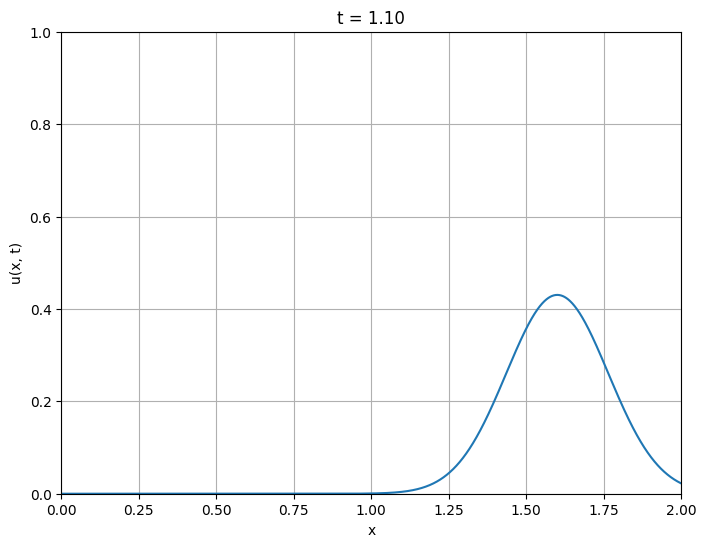

In [ ]:
# Parâmetros da animação
frame_rate = 10  # Taxa de quadros por segundo
output_video = "evolucao_solucao.mp4"

x = np.linspace(xi, xf, 10000)

# Inicialize a figura e o eixo para a animação
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot(x, u(x, ti))
ax.set_ylim(0, 1)
ax.set_xlim(xi, xf)
ax.set_xlabel("x")
ax.set_ylabel("u(x, t)")
ax.set_title(f"t = {ti:.2f}")
ax.grid(True)

# Função para atualizar a animação
def update(frame):
    t = ti + frame / frame_rate
    line.set_ydata(u(x, t))
    ax.set_title(f"t = {t:.2f}")
    return line,

# Crie a animação
ani = FuncAnimation(fig, update, frames=int((tf - ti) * frame_rate), blit=True)

# Salve a animação como um arquivo de vídeo
ani.save(output_video, writer="ffmpeg", fps=frame_rate)

# Exiba a animação
# plt.show()

In [ ]:
# import imageio
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from skimage.transform import resize
# from IPython.display import HTML

# def display_video(video):
#     fig = plt.figure(figsize=(3,3))  #Display size specification

#     mov = []
#     for i in range(len(video)):  #Append videos one by one to mov
#         img = plt.imshow(video[i], animated=True)
#         plt.axis('off')
#         mov.append([img])

#     #Animation creation
#     anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

#     plt.close()
#     return anime
# video = imageio.mimread('/content/evolucao_solucao.mp4')  #Loading video
# #video = [resize(frame, (256, 256))[..., :3] for frame in video]    #Size adjustment (if necessary)
# HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
# from IPython.display import HTML
# from google.colab import files

# # Substitua 'seu_video.mp4' pelo caminho para o seu vídeo MP4
# # video_path = '/content/evolucao_solucao.mp4'
# video_path = files.upload()


# # Use a tag HTML5 <video> para exibir o vídeo
# HTML(f'<video controls src="{video_path}" width="400"></video>')

###Galerkin

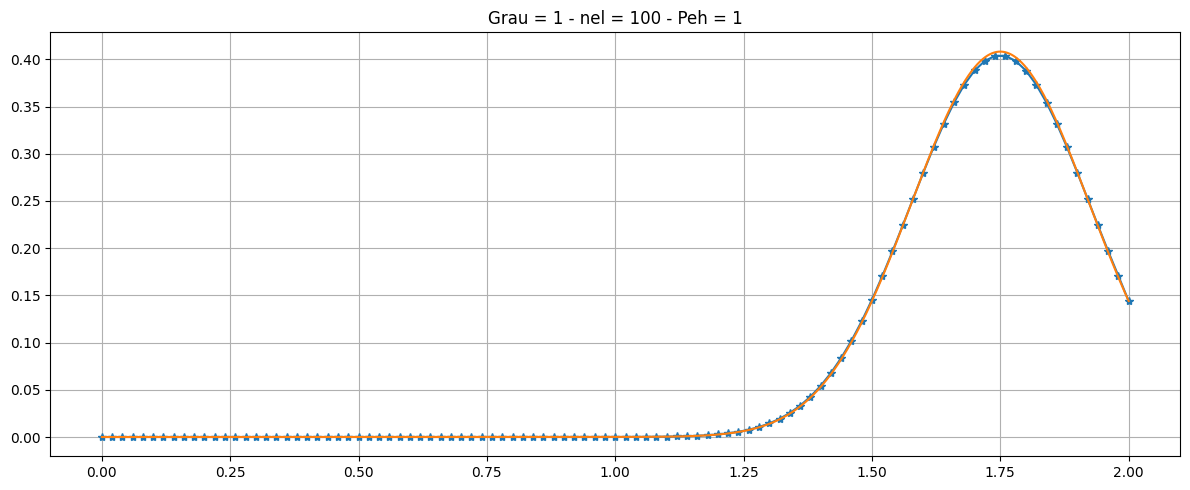

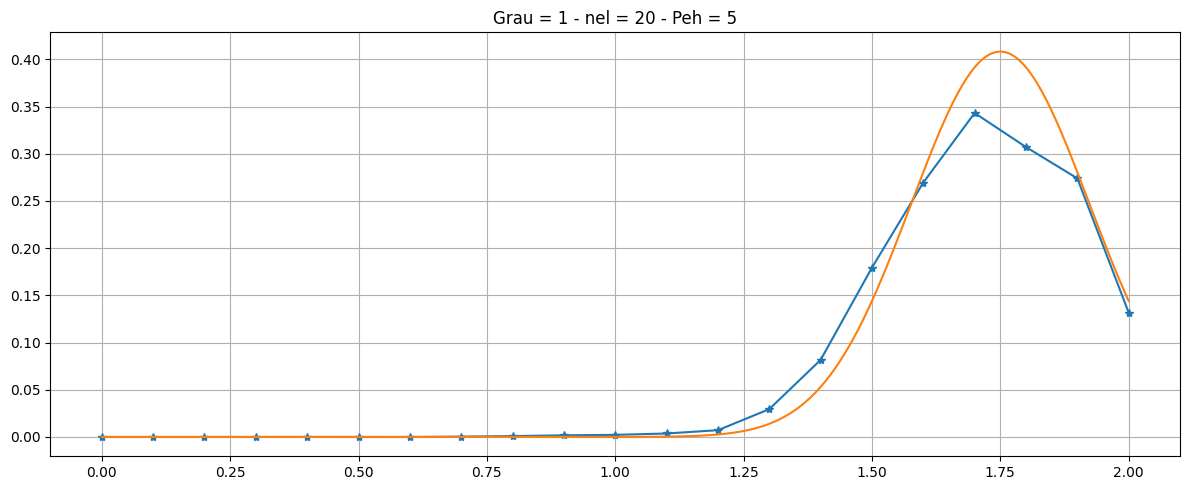

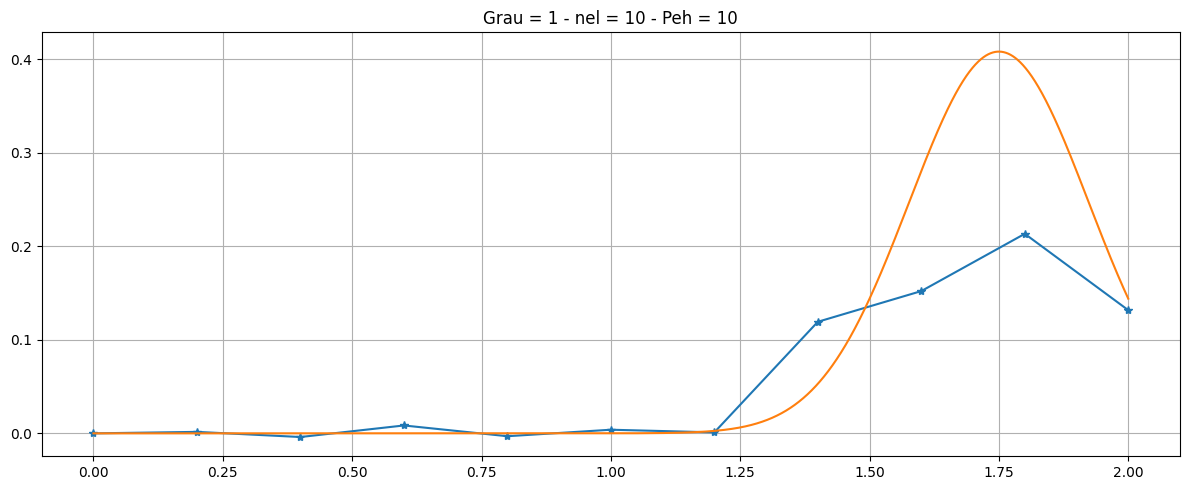

In [ ]:
##Galerkin

for Peh_idx, nel in enumerate(n_values):

    plt.figure(figsize=(12, 5))

    nint = grau + 1
    nen = nint

    x = np.linspace(xi, xf, nel*grau + 1)

    mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
    mat_M_massa = np.zeros((nel*grau + 1, nel*grau + 1))

    data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

    index = 0
    h = x[grau] - x[0]

    dt = h**2

    for n in range(0, nel):

        Me = np.zeros((nint, nint))
        M_massa = np.zeros((nint, nint))
        Fe = np.zeros(nint)

        for l in range(0, nint):

          t, w = data_n[l]
          xx = x_t(t, x[index], x[index+grau])

          for j in range(0, nen):

              # Fe[j] += func_u(xx) * shg(1, j, t, grau) * w * h/2

              for i in range(0, nen):
                  Me[i, j] += epsilon * shg(2, i, t, grau) * shg(2, j, t, grau) * w * 2/h

                  Me[i, j] += kappa * shg(1, i, t, grau) * shg(2, j, t, grau) * w # * 2/h * h/2

                  Me[i, j] += shg(1, i, t, grau) * shg(1, j, t, grau) * w * (h/2) / dt

                  M_massa[i, j] += shg(1, i, t, grau) * shg(1, j, t, grau) * w * (h/2) / dt

                  # Me[i, j] += M_massa[i, j]


        for k in range(0, nint):

            for p in range(0, nint):
                mat_M[index+k, index+p] += Me[k, p]
                mat_M_massa[index+k, index+p] += M_massa[k, p]

        index += grau


    mat_M[0, 0] += kappa_a

    mat_M[-1, -1] += kappa_b

    temp_atual = ti
    solucao = phi_0(x)

    while temp_atual < tf:
      F_fonte = np.dot(np.array(mat_M_massa), np.array(solucao))

      g_a = alpha_1(temp_atual)
      g_b = alpha_2(temp_atual)

      F_fonte[0] += kappa_a*g_a - q_a
      F_fonte[-1] += kappa_b*g_b - q_b

      solucao = np.linalg.solve(mat_M, F_fonte)
      temp_atual += dt


    plt.plot(x, solucao, "-*")
    plt.plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000), tf))
    plt.title(f'Grau = {grau} - nel = {nel} - Peh = {Peh[Peh_idx]}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

###SUPG

####Beta ótimo



Peh 0


beta = 0.31303528549933146 -> tau = 0.0031303528549933147


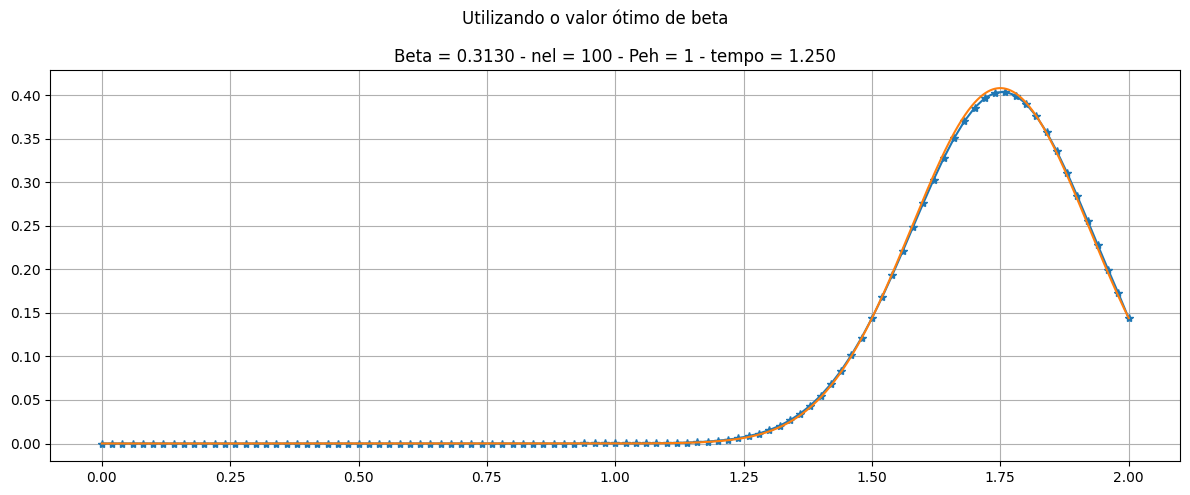



Peh 1


beta = 0.8000908039820194 -> tau = 0.04000454019910097


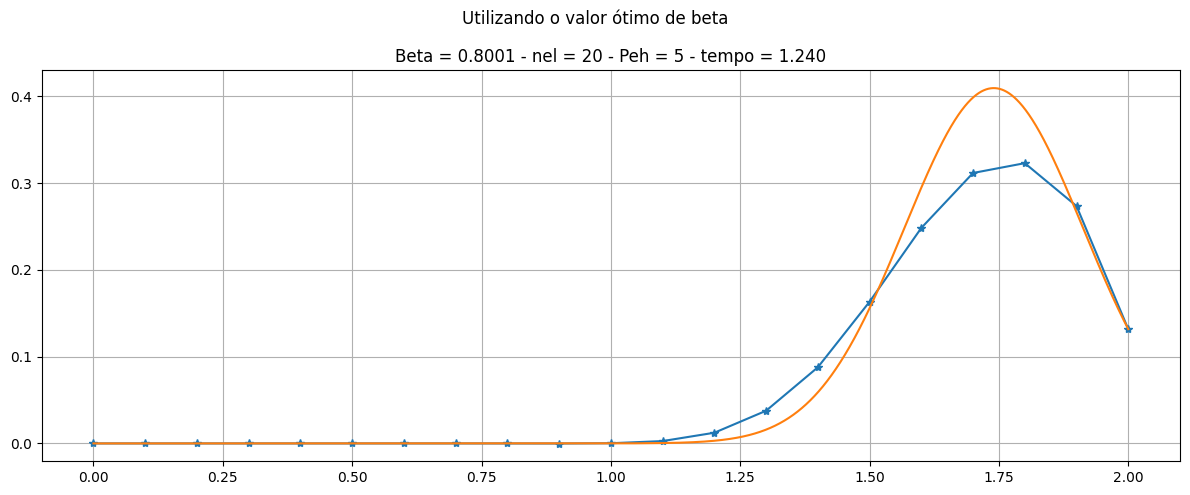



Peh 2


beta = 0.9000000041223074 -> tau = 0.09000000041223075


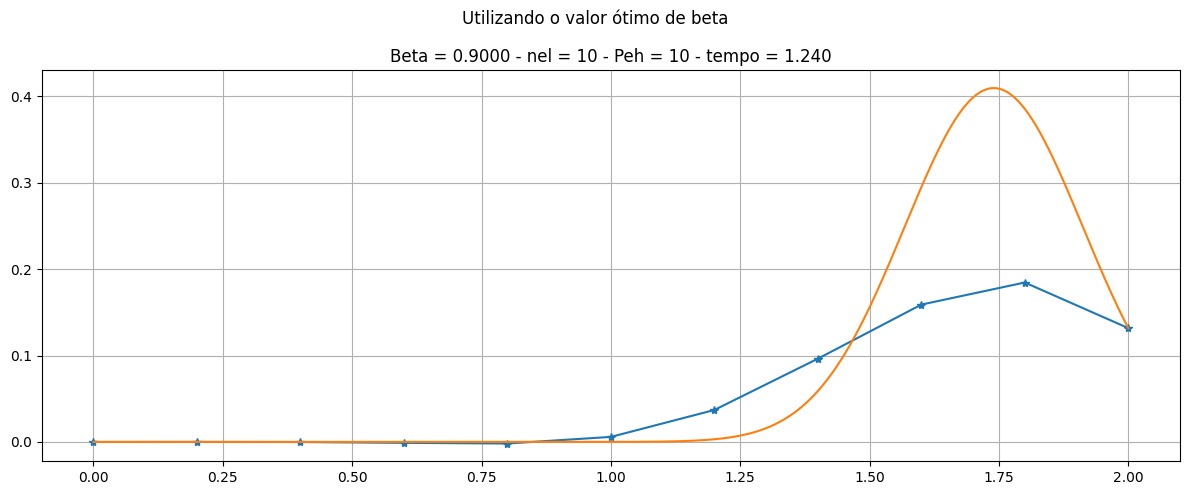

In [ ]:
# SUPG

for Peh_idx, nel in enumerate(n_values):

    plt.figure(figsize=(12, 5))

    nint = grau + 1
    nen = nint

    x = np.linspace(xi, xf, nel*grau + 1)

    mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
    mat_M_massa = np.zeros((nel*grau + 1, nel*grau + 1))

    mat_dev_v = np.zeros((nel*grau + 1, nel*grau + 1))

    data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

    index = 0
    h = x[grau] - x[0]

    dt = h**2

    # beta = 0
    beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])
    # beta = 1 - (1/Peh[Peh_idx])

    tau = beta*h/(2*kappa)


    for n in range(0, nel):

        Me = np.zeros((nint, nint))
        M_massa = np.zeros((nint, nint))
        M_dev_v = np.zeros((nint, nint))
        Fe = np.zeros(nint)

        for l in range(0, nint):

          t, w = data_n[l]
          xx = x_t(t, x[index], x[index+grau])

          for j in range(0, nen):

              for i in range(0, nen):
                  Me[i, j] += (epsilon + tau*kappa**2) * shg(2, i, t, grau) * shg(2, j, t, grau) * w * 2/h

                  Me[i, j] += kappa * shg(1, i, t, grau) * shg(2, j, t, grau) * w

                  Me[i, j] += shg(1, i, t, grau) * shg(1, j, t, grau) * w * (h/2) / dt

                  Me[i, j] += tau * kappa * shg(2, i, t, grau) * shg(1, j, t, grau) * w / dt

                  # Matrizes para o termo fonte
                  M_massa[i, j] += shg(1, i, t, grau) * shg(1, j, t, grau) * w * (h/2) / dt

                  M_dev_v[i, j] += tau * kappa * shg(2, i, t, grau) * shg(1, j, t, grau) * w / dt


        for k in range(0, nint):

            for p in range(0, nint):
                mat_M[index+k, index+p] += Me[k, p]
                mat_M_massa[index+k, index+p] += M_massa[k, p]
                mat_dev_v[index+k, index+p] += M_dev_v[k, p]

        index += grau


    mat_M[0, 0] += kappa_a

    mat_M[-1, -1] += kappa_b

    temp_atual = ti
    solucao = phi_0(x)

    print(f"\n\nPeh {Peh_idx}\n\n")
    print(f"beta = {beta} -> tau = {tau}")
    # print(mat_dev_v)

    while temp_atual <= tf:
      F_fonte = np.dot(np.array(mat_M_massa), np.array(solucao)) + np.dot(np.array(mat_dev_v), np.array(solucao))
      # F_fonte = np.dot(np.array(mat_M_massa), np.array(solucao))

      g_a = alpha_1(temp_atual)
      g_b = alpha_2(temp_atual)

      F_fonte[0] += kappa_a*g_a - q_a
      F_fonte[-1] += kappa_b*g_b - q_b

      solucao = np.linalg.solve(mat_M, F_fonte)
      temp_atual += dt


    plt.plot(x, solucao, "-*")
    plt.plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000), temp_atual-dt))
    plt.title(f'Beta = {beta:.4f} - nel = {nel} - Peh = {Peh[Peh_idx]} - tempo = {temp_atual-dt:.3f}')
    plt.suptitle(f"Utilizando o valor ótimo de beta")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

####Beta limite



Peh 0


beta = 0.0 -> tau = 0.0


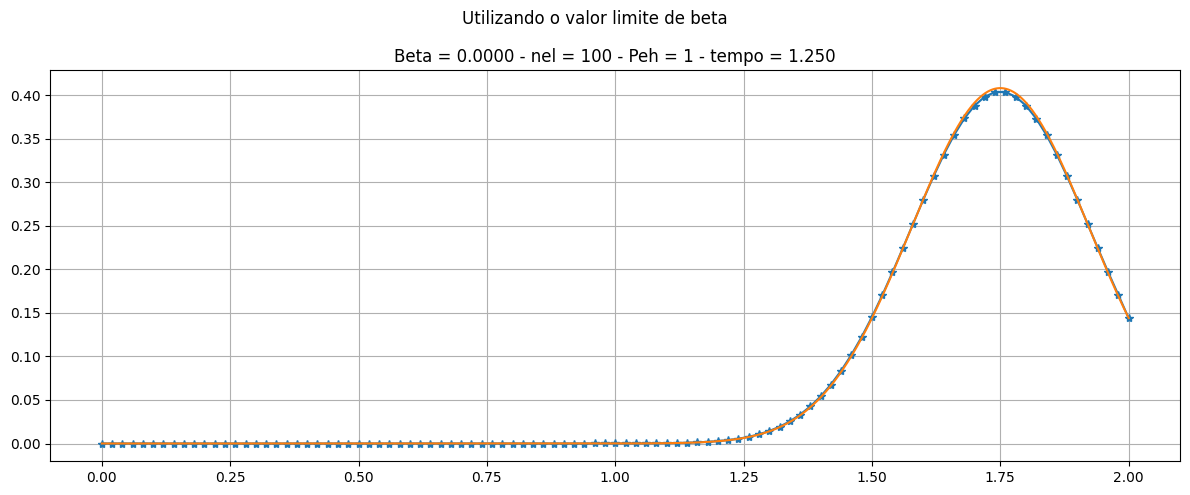



Peh 1


beta = 0.8 -> tau = 0.04000000000000001


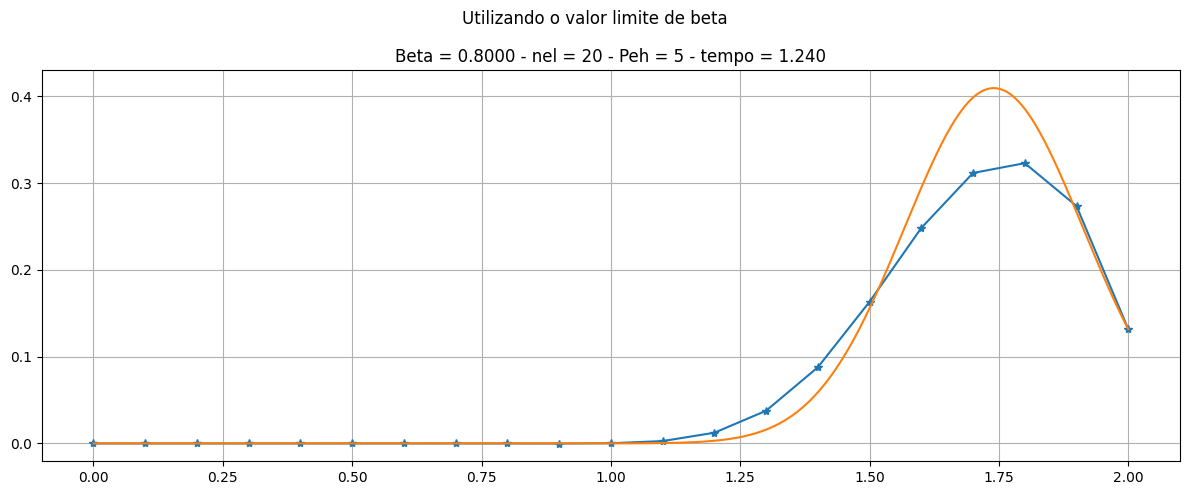



Peh 2


beta = 0.9 -> tau = 0.09000000000000001


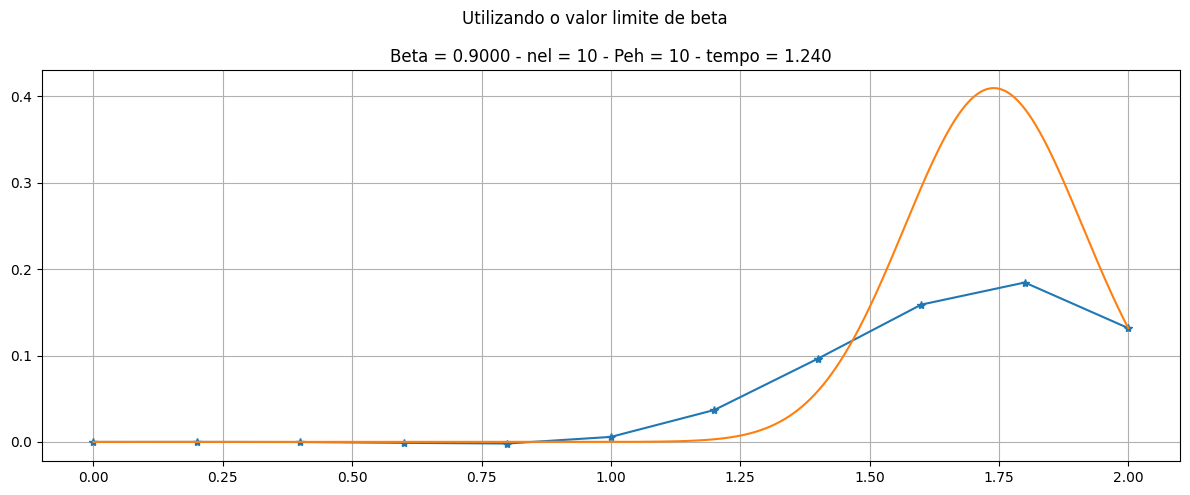

In [ ]:
# SUPG

for Peh_idx, nel in enumerate(n_values):

    plt.figure(figsize=(12, 5))

    nint = grau + 1
    nen = nint

    x = np.linspace(xi, xf, nel*grau + 1)

    mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
    mat_M_massa = np.zeros((nel*grau + 1, nel*grau + 1))

    mat_dev_v = np.zeros((nel*grau + 1, nel*grau + 1))

    data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

    index = 0
    h = x[grau] - x[0]

    dt = h**2

    # beta = 0
    # beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])
    beta = 1 - (1/Peh[Peh_idx])

    tau = beta*h/(2*kappa)


    for n in range(0, nel):

        Me = np.zeros((nint, nint))
        M_massa = np.zeros((nint, nint))
        M_dev_v = np.zeros((nint, nint))
        Fe = np.zeros(nint)

        for l in range(0, nint):

          t, w = data_n[l]
          xx = x_t(t, x[index], x[index+grau])

          for j in range(0, nen):

              for i in range(0, nen):
                  Me[i, j] += (epsilon + tau*kappa**2) * shg(2, i, t, grau) * shg(2, j, t, grau) * w * 2/h

                  Me[i, j] += kappa * shg(1, i, t, grau) * shg(2, j, t, grau) * w

                  Me[i, j] += shg(1, i, t, grau) * shg(1, j, t, grau) * w * (h/2) / dt

                  Me[i, j] += tau * kappa * shg(2, i, t, grau) * shg(1, j, t, grau) * w / dt

                  # Matrizes para o termo fonte
                  M_massa[i, j] += shg(1, i, t, grau) * shg(1, j, t, grau) * w * (h/2) / dt

                  M_dev_v[i, j] += tau * kappa * shg(2, i, t, grau) * shg(1, j, t, grau) * w / dt


        for k in range(0, nint):

            for p in range(0, nint):
                mat_M[index+k, index+p] += Me[k, p]
                mat_M_massa[index+k, index+p] += M_massa[k, p]
                mat_dev_v[index+k, index+p] += M_dev_v[k, p]

        index += grau


    mat_M[0, 0] += kappa_a

    mat_M[-1, -1] += kappa_b

    temp_atual = ti
    solucao = phi_0(x)

    print(f"\n\nPeh {Peh_idx}\n\n")
    print(f"beta = {beta} -> tau = {tau}")
    # print(mat_dev_v)

    while temp_atual <= tf:
      F_fonte = np.dot(np.array(mat_M_massa), np.array(solucao)) + np.dot(np.array(mat_dev_v), np.array(solucao))
      # F_fonte = np.dot(np.array(mat_M_massa), np.array(solucao))

      g_a = alpha_1(temp_atual)
      g_b = alpha_2(temp_atual)

      F_fonte[0] += kappa_a*g_a - q_a
      F_fonte[-1] += kappa_b*g_b - q_b

      solucao = np.linalg.solve(mat_M, F_fonte)
      temp_atual += dt


    plt.plot(x, solucao, "-*")
    plt.plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000), temp_atual-dt))
    plt.title(f'Beta = {beta:.4f} - nel = {nel} - Peh = {Peh[Peh_idx]} - tempo = {temp_atual-dt:.3f}')
    plt.suptitle(f"Utilizando o valor limite de beta")
    plt.grid(True)

    plt.tight_layout()
    plt.show()